## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

```
Copyright © 2024, United States Government, as represented by the Administrator of the National Aeronautics and Space Administration. All rights reserved.

The “"Fault Model Design tools - fmdtools version 2"” software is licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0. 

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```

In [1]:
from examples.eps.eps import EPS
import fmdtools.sim.propagate as propagate

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

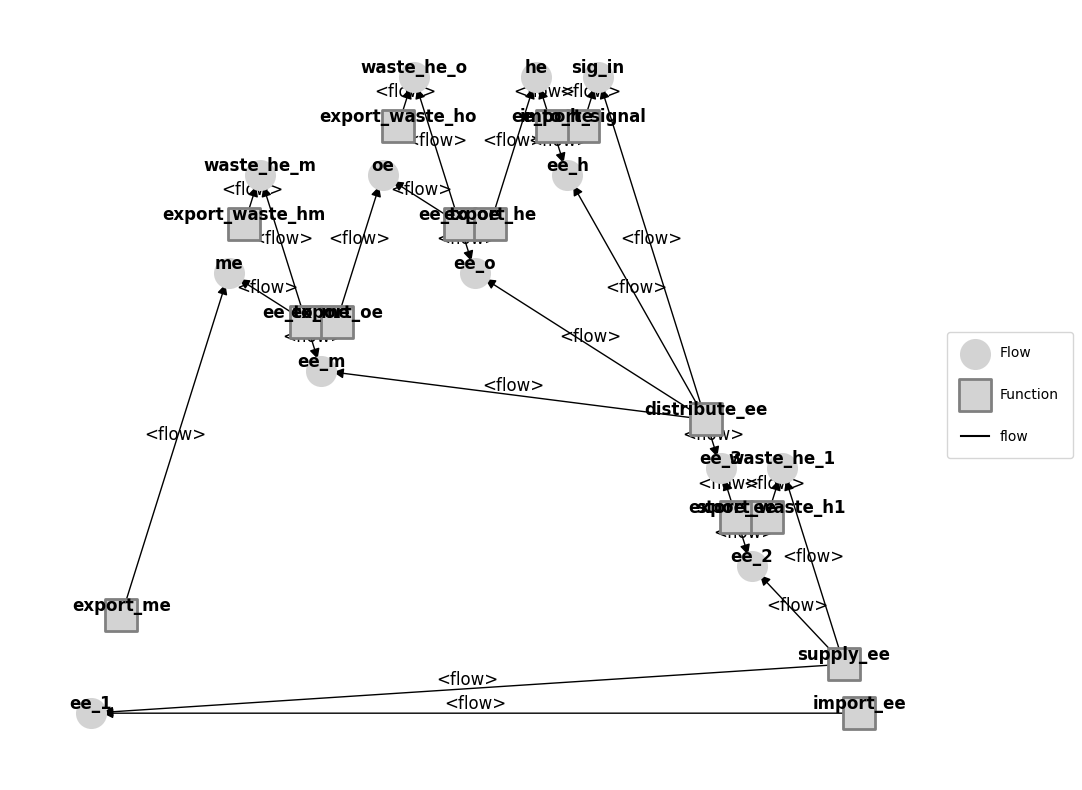

In [2]:
mdl= EPS()
mg = mdl.as_modelgraph()
fig, ax = mg.draw()

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [3]:
result, mdlhist = propagate.one_fault(mdl, 'ee_to_me', 'toohigh_torque', desired_result="graph")

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

/fmdtools/fmdtools/analyze/common.py:549: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(*xlim)


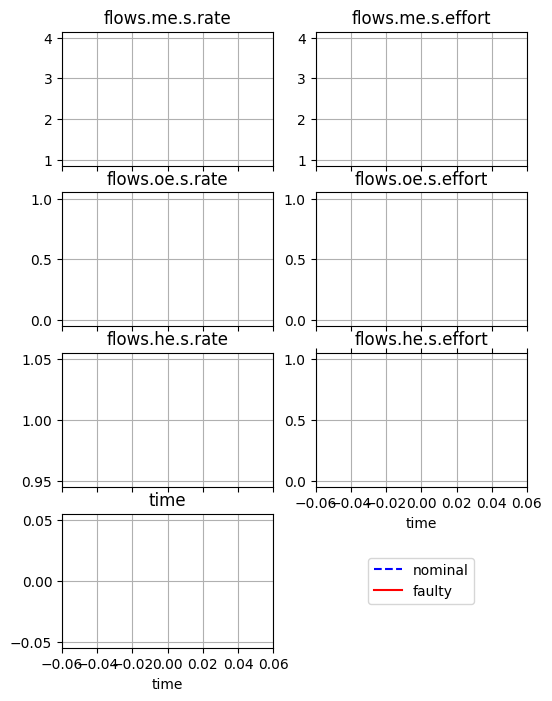

In [4]:
fig, ax = mdlhist.plot_line(*mdlhist.nominal.keys())

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

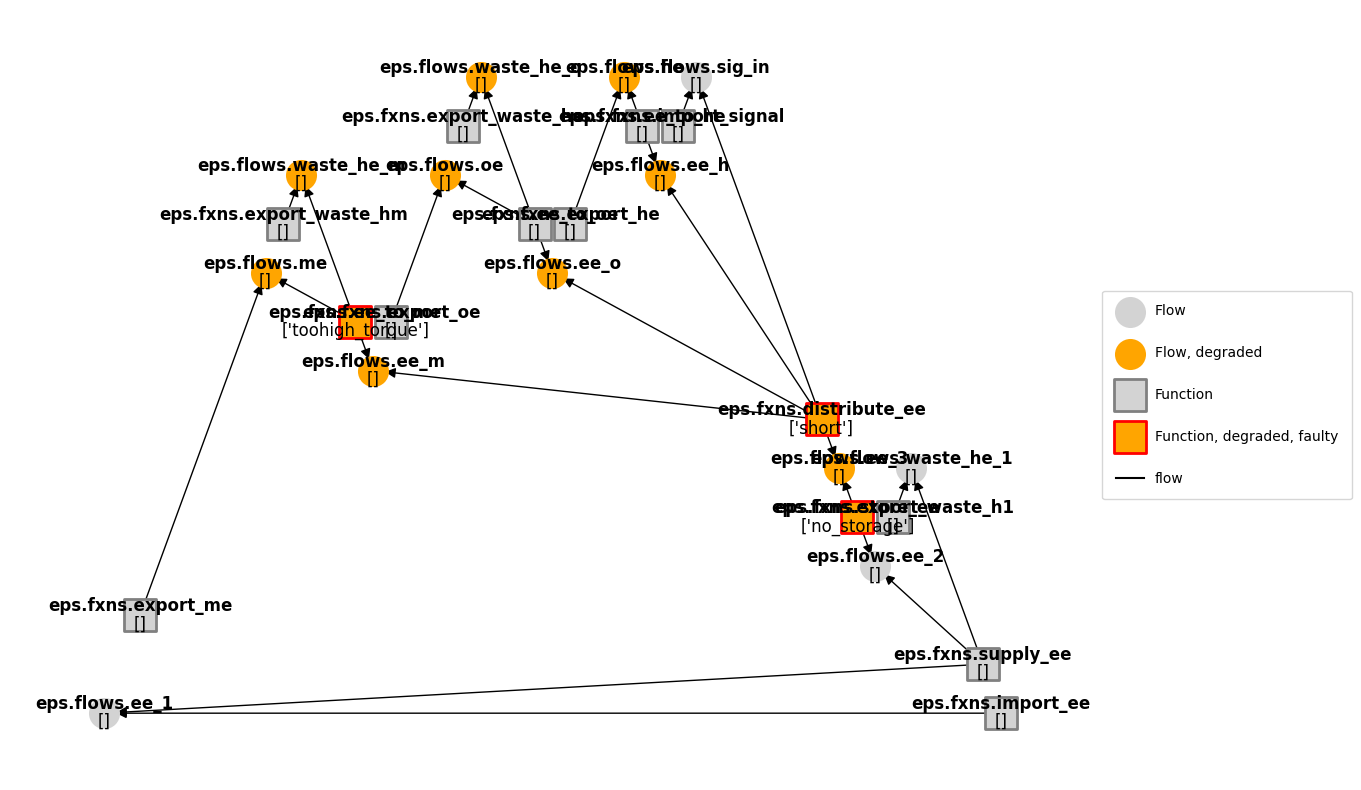

In [5]:
result.graph.set_edge_labels(title='')
fig, ax = result.graph.draw(figsize=(14,10))

We can run the set of single-fault scenarios on this model using ``fmdtools.sim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [6]:
mdl= EPS(track='all')
endclasses, mdlhists = propagate.single_faults(mdl, staged=True)

SCENARIOS COMPLETE:   0%|          | 0/35 [00:00<?, ?it/s]

SCENARIOS COMPLETE:   6%|▌         | 2/35 [00:00<00:02, 12.50it/s]

SCENARIOS COMPLETE:  11%|█▏        | 4/35 [00:00<00:02, 13.93it/s]

SCENARIOS COMPLETE:  17%|█▋        | 6/35 [00:00<00:02, 13.74it/s]

SCENARIOS COMPLETE:  23%|██▎       | 8/35 [00:00<00:01, 13.73it/s]

SCENARIOS COMPLETE:  29%|██▊       | 10/35 [00:00<00:01, 13.22it/s]

SCENARIOS COMPLETE:  34%|███▍      | 12/35 [00:00<00:01, 13.66it/s]

SCENARIOS COMPLETE:  40%|████      | 14/35 [00:01<00:01, 13.96it/s]

SCENARIOS COMPLETE:  46%|████▌     | 16/35 [00:01<00:01, 14.59it/s]

SCENARIOS COMPLETE:  51%|█████▏    | 18/35 [00:01<00:01, 14.84it/s]

SCENARIOS COMPLETE:  57%|█████▋    | 20/35 [00:01<00:00, 15.19it/s]

SCENARIOS COMPLETE:  63%|██████▎   | 22/35 [00:01<00:00, 15.48it/s]

SCENARIOS COMPLETE:  69%|██████▊   | 24/35 [00:01<00:00, 15.77it/s]

SCENARIOS COMPLETE:  74%|███████▍  | 26/35 [00:01<00:00, 15.98it/s]

SCENARIOS COMPLETE:  80%|████████  | 28/35 [00:02<00:00, 11.65it/s]

SCENARIOS COMPLETE:  86%|████████▌ | 30/35 [00:02<00:00, 12.92it/s]

SCENARIOS COMPLETE:  91%|█████████▏| 32/35 [00:02<00:00, 13.83it/s]

SCENARIOS COMPLETE:  97%|█████████▋| 34/35 [00:02<00:00, 14.54it/s]

SCENARIOS COMPLETE: 100%|██████████| 35/35 [00:02<00:00, 14.20it/s]

Using ``analyze.tabulate.result_summary_fmea``, one can see the degradation effects of this fault on the flows:

In [7]:
from fmdtools.analyze.tabulate import result_summary_fmea

In [8]:
tab = result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)
tab.sort_values("expected_cost")

degraded  \
nominal                                                                               []   
ee_to_he_open_circuit_t0p0                                    ['ee_to_he', 'ee_h', 'he']   
supply_ee_open_circuit_t0p0            ['supply_ee', 'ee_2', 'ee_3', 'ee_m', 'ee_o', ...   
ee_to_he_high_heat_t0p0                ['supply_ee', 'store_ee', 'ee_to_he', 'ee_2', ...   
ee_to_oe_optical_resist_t0p0              ['ee_to_oe', 'ee_o', 'oe', 'he', 'waste_he_o']   
supply_ee_short_t0p0                   ['supply_ee', 'store_ee', 'distribute_ee', 'ee...   
ee_to_oe_burnt_out_t0p0                   ['ee_to_oe', 'ee_o', 'oe', 'he', 'waste_he_o']   
ee_to_he_low_heat_t0p0                                                ['ee_to_he', 'he']   
import_signal_no_signal_t0p0           ['import_signal', 'ee_2', 'ee_3', 'ee_m', 'ee_...   
ee_to_he_toohigh_heat_t0p0             ['store_ee', 'distribute_ee', 'ee_to_he', 'ee_...   
supply_ee_adverse_resist_t0p0          ['supply_ee', 'ee_2', 'ee_3', 'ee_m', 'ee_o', ...   
export_waste_h1_ineffective_sink_t0p0            ['export_waste_h1', 'he', 'waste_he_1']   
export_waste_hm_ineffective_sink_t0p0            ['export_waste_hm', 'he', 'waste_he_m']   
export_waste_h1_hot_sink_t0p0                    ['export_waste_h1', 'he', 'waste_he_1']   
export_waste_ho_ineffective_sink_t0p0            ['export_waste_ho', 'he', 'waste_he_o']   
export_waste_hm_hot_sink_t0p0                    ['export_waste_hm', 'he', 'waste_he_m']   
export_waste_ho_hot_sink_t0p0                    ['export_waste_ho', 'he', 'waste_he_o']   
export_he_hot_sink_t0p0                                              ['export_he', 'he']   
import_ee_low_v_t0p0                   ['import_ee', 'ee_1', 'ee_2', 'ee_3', 'ee_m', ...   
export_he_ineffective_sink_t0p0                                      ['export_he', 'he']   
store_ee_low_storage_t0p0                                                   ['store_ee']   
supply_ee_major_overload_t0p0          ['supply_ee', 'store_ee', 'ee_2', 'ee_3', 'ee_...   
import_ee_no_v_t0p0                    ['import_ee', 'ee_1', 'ee_2', 'ee_3', 'ee_m', ...   
store_ee_no_storage_t0p0               ['store_ee', 'ee_3', 'ee_m', 'ee_o', 'ee_h', '...   
import_ee_high_v_t0p0                  ['import_ee', 'store_ee', 'ee_1', 'ee_2', 'ee_...   
import_signal_partial_signal_t0p0      ['import_signal', 'ee_2', 'ee_3', 'ee_m', 'ee_...   
distribute_ee_adverse_resist_t0p0      ['distribute_ee', 'ee_2', 'ee_3', 'ee_m', 'ee_...   
ee_to_me_open_circuit_t0p0                ['ee_to_me', 'ee_m', 'me', 'he', 'waste_he_m']   
distribute_ee_poor_alloc_t0p0          ['distribute_ee', 'ee_2', 'ee_3', 'ee_m', 'ee_...   
ee_to_me_high_torque_t0p0                 ['ee_to_me', 'ee_m', 'me', 'he', 'waste_he_m']   
supply_ee_minor_overload_t0p0          ['supply_ee', 'store_ee', 'distribute_ee', 'ee...   
distribute_ee_open_circuit_t0p0        ['distribute_ee', 'ee_2', 'ee_3', 'ee_m', 'ee_...   
distribute_ee_short_t0p0               ['store_ee', 'distribute_ee', 'ee_3', 'ee_m', ...   
ee_to_me_short_t0p0                    ['store_ee', 'distribute_ee', 'ee_to_me', 'ee_...   
ee_to_me_toohigh_torque_t0p0           ['store_ee', 'distribute_ee', 'ee_to_me', 'ee_...   
ee_to_me_low_torque_t0p0               ['store_ee', 'distribute_ee', 'ee_to_me', 'ee_...   

                                                                           faulty  \
nominal                                                                        []   
ee_to_he_open_circuit_t0p0                                           ['ee_to_he']   
supply_ee_open_circuit_t0p0                                         ['supply_ee']   
ee_to_he_high_heat_t0p0                     ['supply_ee', 'store_ee', 'ee_to_he']   
ee_to_oe_optical_resist_t0p0                                         ['ee_to_oe']   
supply_ee_short_t0p0                   ['supply_ee', 'store_ee', 'distribute_ee']   
ee_to_oe_burnt_out_t0p0                                              ['ee_to_oe'